# Setting Up the Environment

In [ ]:
pip install torch torchvision pandas scikit-learn matplotlib opencv-python tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [48]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images

Dataset URL: https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images
License(s): CC0-1.0
  0% 0.00/98.7M [00:00<?, ?B/s]
100% 98.7M/98.7M [00:00<00:00, 1.34GB/s]


In [ ]:
!unzip melanoma-skin-cancer-dataset-of-10000-images.zip -d melanoma_dataset

Streaming output truncated to the last 5000 lines.
  inflating: melanoma_dataset/melanoma_cancer_dataset/train/benign/melanoma_643.jpg  
  inflating: melanoma_dataset/melanoma_cancer_dataset/train/benign/melanoma_644.jpg  
  inflating: melanoma_dataset/melanoma_cancer_dataset/train/benign/melanoma_645.jpg  
  inflating: melanoma_dataset/melanoma_cancer_dataset/train/benign/melanoma_646.jpg  
  inflating: melanoma_dataset/melanoma_cancer_dataset/train/benign/melanoma_647.jpg  
  inflating: melanoma_dataset/melanoma_cancer_dataset/train/benign/melanoma_648.jpg  
  inflating: melanoma_dataset/melanoma_cancer_dataset/train/benign/melanoma_649.jpg  
  inflating: melanoma_dataset/melanoma_cancer_dataset/train/benign/melanoma_65.jpg  
  inflating: melanoma_dataset/melanoma_cancer_dataset/train/benign/melanoma_650.jpg  
  inflating: melanoma_dataset/melanoma_cancer_dataset/train/benign/melanoma_651.jpg  
  inflating: melanoma_dataset/melanoma_cancer_dataset/train/benign/melanoma_652.jpg  
  in

In [ ]:
import os

data_dir = 'melanoma_dataset'
for root, dirs, files in os.walk(data_dir):
    print(root, len(files))

melanoma_dataset 0
melanoma_dataset/melanoma_cancer_dataset 0
melanoma_dataset/melanoma_cancer_dataset/test 0
melanoma_dataset/melanoma_cancer_dataset/test/benign 500
melanoma_dataset/melanoma_cancer_dataset/test/malignant 500
melanoma_dataset/melanoma_cancer_dataset/train 0
melanoma_dataset/melanoma_cancer_dataset/train/benign 5000
melanoma_dataset/melanoma_cancer_dataset/train/malignant 4605


# Load, Create, Train the CNN

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

full_train_data = datasets.ImageFolder('melanoma_dataset/melanoma_cancer_dataset/train', transform=transform)

val_split = 0.2
val_size = int(len(full_train_data) * val_split)
train_size = len(full_train_data) - val_size

train_data, val_data = random_split(full_train_data, [train_size, val_size])

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

test_data = datasets.ImageFolder('melanoma_dataset/melanoma_cancer_dataset/test', transform=transform)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.fc1 = nn.Linear(128 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 14 * 14)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [ ]:
#Define Eval Val Loss Function
def evaluate_val_loss(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.float().to(device).unsqueeze(1)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    return val_loss / len(val_loader)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

num_epochs = 20
patience = 3
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.float().to(device).unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / len(train_loader)
    val_loss = evaluate_val_loss(model, val_loader, criterion)

    print(f"Epoch {epoch+1} - Train Loss: {avg_epoch_loss:.4f} | Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

Epoch 1 - Train Loss: 0.3450 | Val Loss: 0.3300
Epoch 2 - Train Loss: 0.2745 | Val Loss: 0.2577
Epoch 3 - Train Loss: 0.2573 | Val Loss: 0.2530
Epoch 4 - Train Loss: 0.2443 | Val Loss: 0.2311
Epoch 5 - Train Loss: 0.2281 | Val Loss: 0.2339
Epoch 6 - Train Loss: 0.2185 | Val Loss: 0.2754
Epoch 7 - Train Loss: 0.2135 | Val Loss: 0.2233
Epoch 8 - Train Loss: 0.2026 | Val Loss: 0.2242
Epoch 9 - Train Loss: 0.1994 | Val Loss: 0.2108
Epoch 10 - Train Loss: 0.1877 | Val Loss: 0.2151
Epoch 11 - Train Loss: 0.1823 | Val Loss: 0.2069
Epoch 12 - Train Loss: 0.1740 | Val Loss: 0.2024
Epoch 13 - Train Loss: 0.1678 | Val Loss: 0.2266
Epoch 14 - Train Loss: 0.1652 | Val Loss: 0.2130
Epoch 15 - Train Loss: 0.1598 | Val Loss: 0.1895
Epoch 16 - Train Loss: 0.1529 | Val Loss: 0.3218
Epoch 17 - Train Loss: 0.1460 | Val Loss: 0.2633
Epoch 18 - Train Loss: 0.1268 | Val Loss: 0.2527
Early stopping triggered.


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)
        outputs = model(inputs)

        predicted = (outputs > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 91.60%


## After lowering the learning rate to 0.0005 from 0.001, I was able to increase the test accuracy to 91.60% from 90.20%. Preventing overfitting was a big priority here, so implementing an early stopping mechanism was crucial.

# Visualizing Some Predictions

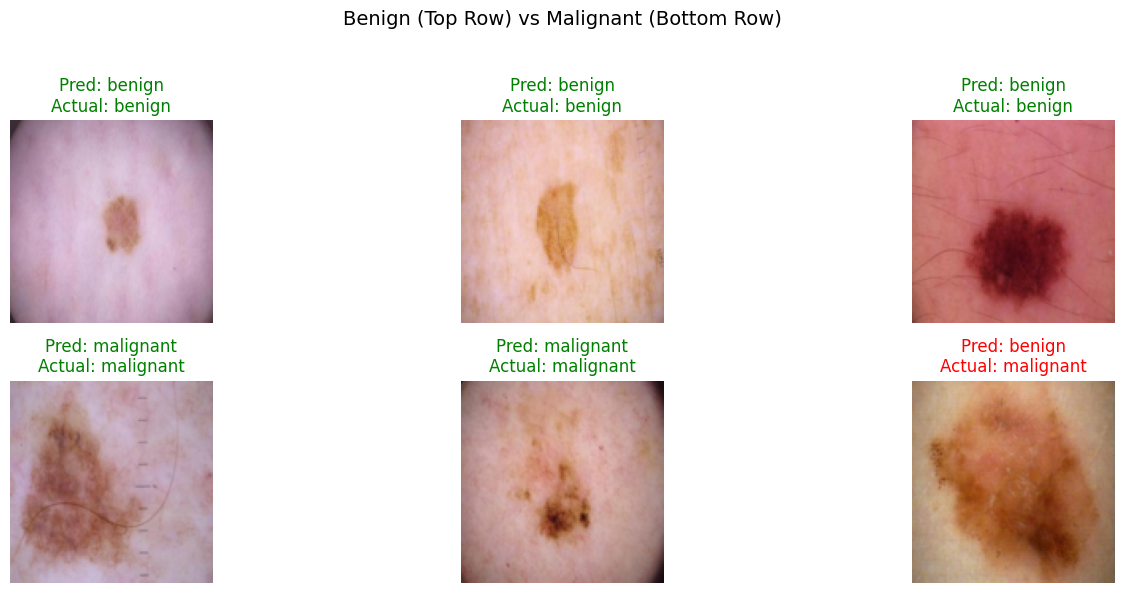

In [ ]:
import matplotlib.pyplot as plt

benign_images = []
benign_labels = []
benign_preds = []

malignant_images = []
malignant_labels = []
malignant_preds = []

model.eval()

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = (outputs > 0.5).int()

        for i in range(len(labels)):
            label = labels[i].item()
            pred = preds[i].item()
            img = inputs[i]

            if label == 0 and len(benign_images) < 3:
                benign_images.append(img)
                benign_labels.append(label)
                benign_preds.append(pred)

            elif label == 1 and len(malignant_images) < 3:
                malignant_images.append(img)
                malignant_labels.append(label)
                malignant_preds.append(pred)

        if len(benign_images) >= 3 and len(malignant_images) >= 3:
            break

class_names = ['benign', 'malignant']

all_images = benign_images + malignant_images
all_labels = benign_labels + malignant_labels
all_preds = benign_preds + malignant_preds

plt.figure(figsize=(15, 6))
for i in range(6):
    img = all_images[i].cpu().permute(1, 2, 0).numpy()
    img = (img * 0.5) + 0.5

    true_label = class_names[all_labels[i]]
    pred_label = class_names[all_preds[i]]
    color = 'green' if all_preds[i] == all_labels[i] else 'red'

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Pred: {pred_label}\nActual: {true_label}", color=color)
    plt.axis('off')

plt.suptitle("Benign (Top Row) vs Malignant (Bottom Row)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
